In [487]:
from bokeh.models import NumeralTickFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#names1 = ["Total_Co2_Emissions","Pol_Inst","Technologie","Shock","Lignite","Coal","CCGT","OCGT","Wind_Onshore","Wind_Offshore","Solar","LitIon","PSH","Total"]
data = pd.read_excel(r'Figures_Data_Preparation_9-12.xlsx', sheet_name = 'Figure 9-12', skiprows=[1])
#df = df.set_index([df.iloc[0], df.columns[0]])
data.head()

,Row,Total_CO2_Emissions,Pol_Inst,Technologie,Shock,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Lignite,Hard Coal,CCGT,OCGT,Wind Onshore,Wind Offshore,PV,Li-Ion,PSH,Mixed
0,1455555555,1503.6,CO2_Cap,Lignite,-0.1,455555555,1,4.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1535555555,1503.6,CO2_Cap,Gas,-0.2,535555555,2,3.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1545555555,1503.6,CO2_Cap,Gas,-0.1,545555555,2,4.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1553555555,1503.6,CO2_Cap,Hardcoal,-0.2,553555555,3,3.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1554555555,1503.6,CO2_Cap,Hardcoal,-0.1,554555555,3,4.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [488]:
data.dtypes

Row                      int64
Total_CO2_Emissions    float64
Pol_Inst                object
Technologie             object
Shock                  float64
Unnamed: 5               int64
Unnamed: 6               int64
Unnamed: 7             float64
Unnamed: 8             float64
Unnamed: 9             float64
Lignite                float64
Hard Coal                int64
CCGT                   float64
OCGT                   float64
Wind Onshore           float64
Wind Offshore          float64
PV                     float64
Li-Ion                 float64
PSH                    float64
Mixed                  float64
dtype: object

In [489]:
data.columns


Index(['Row', 'Total_CO2_Emissions', 'Pol_Inst', 'Technologie', 'Shock',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Lignite', 'Hard Coal', 'CCGT', 'OCGT', 'Wind Onshore', 'Wind Offshore',
       'PV', 'Li-Ion', 'PSH', 'Mixed'],
      dtype='object')

In [490]:
data["Technologie"]= data["Technologie"].replace("Hardcoal", "Hard coal")
data["Technologie"]= data["Technologie"].replace("Solar", "PV")
data["Technologie"]= data["Technologie"].replace("Wind_Onshore", "Wind Onshore")
data["Technologie"]= data["Technologie"].replace("Wind_Offshore", "Wind Offshore")
data["Technologie"]= data["Technologie"].replace("Lit_Ion", "Li-Ion")
data0 = data[['Technologie', "Shock", "Pol_Inst" ,'Lignite', 'Hard Coal', 'CCGT', 'OCGT', 'Wind Onshore', 'Wind Offshore',
       'PV', 'Li-Ion', 'PSH', 'Mixed']]
data0.Technologie.unique()

array(['Lignite', 'Gas', 'Hard coal', 'Demand', 'PV', 'Wind Onshore',
       'Wind Offshore', 'Li-Ion', 'PSH', 'no'], dtype=object)

In [491]:
data0 = data0.loc[data['Technologie']!='no']
data0 = data0.loc[(data["Shock"] == -0.2) | (data["Shock"] == 0.2)]

data0.Technologie.unique()



array(['Gas', 'Hard coal', 'Demand', 'PV', 'Wind Onshore',
       'Wind Offshore', 'Li-Ion', 'PSH', 'Lignite'], dtype=object)

In [492]:
data_co2_cap0 = data0.loc[data['Pol_Inst']=='CO2_Cap']

In [493]:
data_co2_cap = data_co2_cap0[['Technologie','Lignite', 'Hard Coal', 'CCGT', 'OCGT', 'Wind Onshore', 'Wind Offshore',
       'PV', 'Li-Ion', 'PSH', 'Mixed']]

In [494]:
data_co2_cap.Technologie.unique()

array(['Gas', 'Hard coal', 'Demand', 'PV', 'Wind Onshore',
       'Wind Offshore', 'Li-Ion', 'PSH', 'Lignite'], dtype=object)

In [495]:
data_co2_cap0

data_co2_cap['Technologie'] = pd.Categorical(data_co2_cap0['Technologie'], [ 'Lignite', 'Gas', 'Hard coal', 'PV', 'Wind Onshore',
       'Wind Offshore', 'Li-Ion', 'PSH', 'Demand'])
data_co2_cap.sort_values("Technologie")
data_co2_cap

<ipython-input-495-078049eb2d51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_co2_cap['Technologie'] = pd.Categorical(data_co2_cap0['Technologie'], [ 'Lignite', 'Gas', 'Hard coal', 'PV', 'Wind Onshore',


,Technologie,Lignite,Hard Coal,CCGT,OCGT,Wind Onshore,Wind Offshore,PV,Li-Ion,PSH,Mixed
1,Gas,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Hard coal,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Demand,0.0,0,-0.55,-0.58,-0.15,-0.15,-0.14,-0.53,-0.33,-0.22
7,PV,0.0,0,0.00,-0.01,-0.02,-0.04,-0.18,0.01,-0.01,-0.06
9,Wind Onshore,0.0,0,0.00,0.00,-0.17,-0.13,-0.07,-0.25,-0.03,-0.11
11,Wind Offshore,0.0,0,0.00,0.00,-0.12,-0.17,-0.14,-0.07,-0.08,-0.12
13,Li-Ion,0.0,0,0.00,0.00,0.00,0.00,0.00,-0.16,-0.01,0.00
15,PSH,0.0,0,0.00,-0.07,0.00,0.00,0.00,-0.09,-0.18,-0.01
19,PSH,0.0,0,0.00,0.00,0.00,0.00,0.00,0.02,0.04,0.00
21,Li-Ion,0.0,0,0.00,0.00,0.00,0.00,0.00,0.08,0.01,0.00


In [496]:
#hue1 = ["#ADD8E6", "#414141", "#FFA500", "#fff340", "#00b8f2", "#a19595", "#f23333", "#2397fc"]

#hue1

In [497]:
import seaborn as sns
import matplotlib.pyplot as plt
df_melt=pd.melt(data_co2_cap,id_vars=['Technologie'], var_name='intensities', value_name='values')
df_melt

,Technologie,intensities,values
0,Gas,Lignite,0.00
1,Hard coal,Lignite,0.00
2,Demand,Lignite,0.00
3,PV,Lignite,0.00
4,Wind Onshore,Lignite,0.00
...,...,...,...
165,PV,Mixed,0.01
166,Demand,Mixed,0.00
167,Hard coal,Mixed,0.00
168,Gas,Mixed,0.00


In [498]:
#df = df_melt[(df_melt[['values']] != 0).all(axis=1)]


In [499]:
# data["Technologie"].unique()
df_melt['values']=df_melt['values'].replace(0, np.nan)
df_melt
#['Technologie','Lignite', 'Coal', 'CCGT', 'OCGT', 'Wind_Onshore', 'Wind_Offshore',
#       'Solar', 'LitIon', 'PSH', 'Total']

,Technologie,intensities,values
0,Gas,Lignite,NaN
1,Hard coal,Lignite,NaN
2,Demand,Lignite,NaN
3,PV,Lignite,NaN
4,Wind Onshore,Lignite,NaN
...,...,...,...
165,PV,Mixed,0.01
166,Demand,Mixed,NaN
167,Hard coal,Mixed,NaN
168,Gas,Mixed,NaN


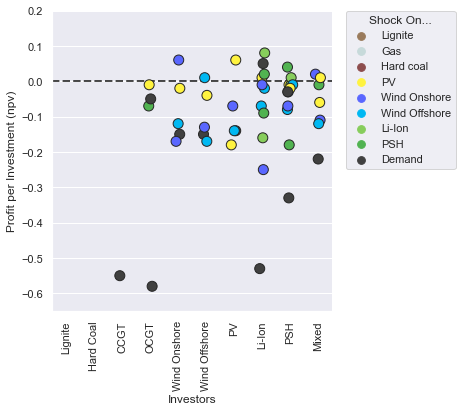

In [500]:
import matplotlib.pyplot as plt
#sns.set_palette(sns.color_palette(hue1))
ax = sns.catplot(x="intensities", y="values", data=df_melt,linewidth=1, s=10, hue='Technologie', palette = sns.color_palette(["#9A7B5C", "#C7DADA", "#8D4D4D", "#FFF340", "#5A67FF", "#00B8F2", "#87CD5C", "#51B351", "#404040"]))
sns.set(rc={'figure.figsize':(20,15)})

ax.set_xticklabels(rotation = 90)

ax.axes[0][0].axhline(y = 0, ls='--', color='black', linewidth=2, alpha=.7)
ax._legend.remove()
ax.set_axis_labels("","")
#ax.set_xlim((-0.65,0.2))
ax._legend.set_title("Shock on...")
# ax.set_xlabels()
ax.set_ylabels("Profit per Investment (npv)")
ax.set_xlabels("Investors")
plt.ylim(-0.65,0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Shock On...");

In [501]:
df_melt.head(200)

,Technologie,intensities,values
0,Gas,Lignite,NaN
1,Hard coal,Lignite,NaN
2,Demand,Lignite,NaN
3,PV,Lignite,NaN
4,Wind Onshore,Lignite,NaN
...,...,...,...
165,PV,Mixed,0.01
166,Demand,Mixed,NaN
167,Hard coal,Mixed,NaN
168,Gas,Mixed,NaN


In [502]:
#plt.savefig(images\Figure9_CO2_Cap, format="svg")
ax.savefig("images\Figure9_CO2_Cap.svg")